# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

## Mounting Google Drive

In [5]:
import io
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [7]:
df = pd.read_csv('/content/drive/My Drive/compresive_strength_concrete.csv')
print(df.shape)
print(df.columns)
df.head()

(1030, 9)
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
print(np.sum(np.isnan(df)))
print(np.sum(pd.isnull(df)))

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                  

##### Giving Smaller names to features

In [9]:
  df.columns = ['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'Coarse', 'Fine', 'Age', 'Strenght']
  df.head()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,Fine,Age,Strenght
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Seperating Labels from data set

In [10]:
x = df.drop(labels='Strenght', axis=1)
y = df[['Strenght']]
# Seperating columns
x.head(), y.head()

(   Cement  Blast  FlyAsh  Water  Superplasticizer  Coarse   Fine  Age
 0   540.0    0.0     0.0  162.0               2.5  1040.0  676.0   28
 1   540.0    0.0     0.0  162.0               2.5  1055.0  676.0   28
 2   332.5  142.5     0.0  228.0               0.0   932.0  594.0  270
 3   332.5  142.5     0.0  228.0               0.0   932.0  594.0  365
 4   198.6  132.4     0.0  192.0               0.0   978.4  825.5  360,
    Strenght
 0     79.99
 1     61.89
 2     40.27
 3     41.05
 4     44.30)

#### Splitting Data into parts for testing, validation and training

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.5, random_state = 69)
test_data, val_data, test_labels, val_lables = train_test_split(test_data, test_labels, test_size=0.3, random_state = 69)
train_data.shape, test_data.shape, val_data.shape

((515, 8), (360, 8), (155, 8))

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.transform(test_data)
val_data = sc.transform(val_data)

#### Building Model

In [13]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(8, activation='relu')) 
  model.add(layers.Dense(6))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [14]:
model = build_model()
history = model.fit(train_data, train_labels, epochs = 100, validation_data=(val_data, val_lables))

Epoch 1/100
17/17 [==============================] - 4s 24ms/step - loss: 1517.3202 - mae: 35.1250 - val_loss: 1572.6803 - val_mae: 36.1008
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1538.8433 - mae: 35.3106 - val_loss: 1565.3013 - val_mae: 35.9929
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 1538.3695 - mae: 35.3135 - val_loss: 1558.5494 - val_mae: 35.8938
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 1536.0002 - mae: 35.3969 - val_loss: 1551.4690 - val_mae: 35.7897
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 1543.8699 - mae: 35.5044 - val_loss: 1544.1925 - val_mae: 35.6821
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1438.9259 - mae: 34.1719 - val_loss: 1536.1606 - val_mae: 35.5635
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1529.7846 - mae: 35.1142 - val_loss: 1527.3523 - val_mae: 35.4325
Epoch 8/100
17/17 [=======

In [15]:
pred = model.predict(test_data)
pred[0]

array([30.940416, 30.574068, 31.46088 , 31.017344, 32.022762, 30.547037],
      dtype=float32)

In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

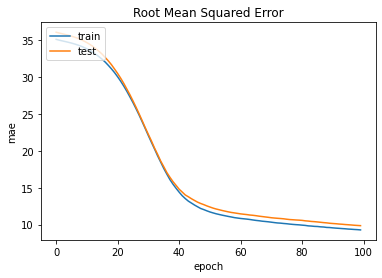

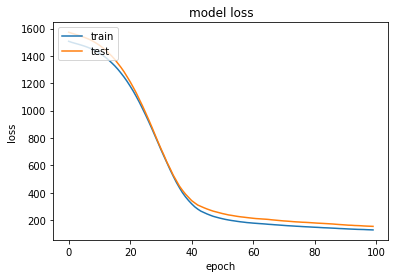

In [17]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Root Mean Squared Error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Building New model

In [18]:
def build_new_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(32, activation='relu')) 
  model.add(layers.Dense(16))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [19]:
model = build_new_model()
new = model.fit(train_data, train_labels, epochs = 250, validation_data=(val_data, val_lables))

Epoch 1/250
17/17 [==============================] - 1s 12ms/step - loss: 1466.3420 - mae: 34.6776 - val_loss: 1509.8661 - val_mae: 35.2359
Epoch 2/250
17/17 [==============================] - 0s 5ms/step - loss: 1420.8076 - mae: 34.1466 - val_loss: 1443.8595 - val_mae: 34.3185
Epoch 3/250
17/17 [==============================] - 0s 4ms/step - loss: 1352.1609 - mae: 32.9221 - val_loss: 1346.8500 - val_mae: 32.9319
Epoch 4/250
17/17 [==============================] - 0s 4ms/step - loss: 1212.1435 - mae: 31.1515 - val_loss: 1218.3065 - val_mae: 31.0169
Epoch 5/250
17/17 [==============================] - 0s 4ms/step - loss: 1090.0773 - mae: 28.7156 - val_loss: 1066.5178 - val_mae: 28.5995
Epoch 6/250
17/17 [==============================] - 0s 4ms/step - loss: 973.2083 - mae: 27.1634 - val_loss: 888.8297 - val_mae: 25.5220
Epoch 7/250
17/17 [==============================] - 0s 4ms/step - loss: 805.7158 - mae: 23.8576 - val_loss: 718.3164 - val_mae: 22.3076
Epoch 8/250
17/17 [===========

In [20]:
y_pred = model.predict(test_data)
y_pred

array([[12.736445, 12.494066, 12.553082, ..., 12.417172, 12.671363,
        12.571721],
       [38.903103, 37.902306, 38.274246, ..., 38.25884 , 38.29605 ,
        38.213997],
       [59.090553, 59.146286, 59.242603, ..., 59.259357, 59.38673 ,
        58.84319 ],
       ...,
       [25.629799, 25.131392, 25.837648, ..., 25.877022, 25.672302,
        25.49551 ],
       [34.43264 , 33.860577, 34.29968 , ..., 34.05559 , 34.275078,
        33.918278],
       [39.474804, 39.047318, 39.33595 , ..., 39.34614 , 39.35028 ,
        40.02879 ]], dtype=float32)

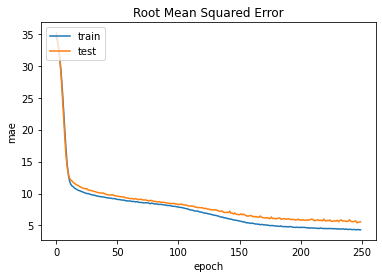

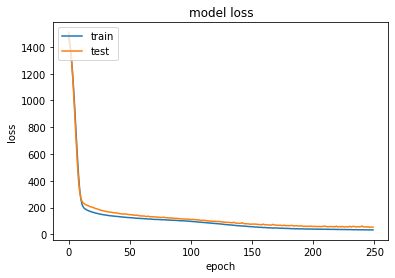

In [21]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(new.history['mae'])
plt.plot(new.history['val_mae'])
plt.title('Root Mean Squared Error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(new.history['loss'])
plt.plot(new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

New Model is performing Better then old as we increaded density of layers